# Data Cleaning

Cleaning des données dans le but de créer un modele de prédiction de prix 

- Traiter les données manquantes
- Regrouper/supprimer les données inutiles
- Supprimer les doublons
- Convertir string en int/float/bool

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/immo_collect.csv', index_col=0)
df.head()

,Lien,Prix,Type de propriété,Vente publique,Immeuble de rapport,Bien neuf,Code Postal,Ville,Sous-type de propriété,Nombre de façades,...,Type de cuisine,Feu ouvert,Meublé,Jardin,Surface du jardin,Terrasse,Surface de la terrasse,Surface totale du terrain,Piscine,Surface de la zone constructible
0,https://www.immoweb.be/fr/annonce/appartement/...,280000,Appartement,False,False,True,1180,Uccle,Appartement,2.0,...,Hyper équipée,False,False,True,25.0,True,12.0,None,False,None
1,https://www.immoweb.be/fr/annonce/appartement/...,282500,Appartement,False,False,True,1180,Uccle,Appartement,None,...,Américaine hyper-équipée,False,False,False,None,True,5.0,None,False,None
2,https://www.immoweb.be/fr/annonce/appartement/...,412500,Appartement,False,False,True,1180,Uccle,Appartement,None,...,Américaine hyper-équipée,False,False,False,None,True,15.0,None,False,None
3,https://www.immoweb.be/fr/annonce/appartement/...,380000,Appartement,False,False,True,1160,Auderghem,Appartement,2.0,...,Hyper équipée,False,False,False,None,True,13.0,None,False,87.0
4,https://www.immoweb.be/fr/annonce/appartement/...,165000,Appartement,False,False,True,6000,Charleroi,Appartement,4.0,...,Hyper équipée,False,False,False,None,False,None,None,False,None


In [2]:
df.shape

(18201, 23)

In [3]:
df.dtypes

Lien                                object
Prix                                object
Type de propriété                   object
Vente publique                        bool
Immeuble de rapport                   bool
Bien neuf                             bool
Code Postal                          int64
Ville                               object
Sous-type de propriété              object
Nombre de façades                   object
Etat du bâtiment                    object
Surface habitable                   object
Nombre de chambre(s)                object
Type de cuisine                     object
Feu ouvert                            bool
Meublé                                bool
Jardin                                bool
Surface du jardin                   object
Terrasse                              bool
Surface de la terrasse              object
Surface totale du terrain           object
Piscine                               bool
Surface de la zone constructible    object
dtype: obje

In [4]:
df.describe(include='object')

,Lien,Prix,Type de propriété,Ville,Sous-type de propriété,Nombre de façades,Etat du bâtiment,Surface habitable,Nombre de chambre(s),Type de cuisine,Surface du jardin,Surface de la terrasse,Surface totale du terrain,Surface de la zone constructible
count,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201
unique,18201,2160,2,2242,25,10,7,1099,52,9,803,194,3062,411
top,https://www.immoweb.be/fr/annonce/appartement/...,295000,Maison,Uccle,Maison,None,Excellent état,None,3,Équipée,None,None,None,None
freq,1,221,9640,530,6679,5514,5898,2316,3956,6205,14880,11195,9512,16343


In [5]:
df.describe(include='bool')

,Vente publique,Immeuble de rapport,Bien neuf,Feu ouvert,Meublé,Jardin,Terrasse,Piscine
count,18201,18201,18201,18201,18201,18201,18201,18201
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False
freq,17374,17350,16127,17227,17646,12579,11267,17621


In [6]:
# Affichage des valeurs manquantes
df.isna().sum()
# Pour le coup, pas case vide ! Nice ...

Lien                                0
Prix                                0
Type de propriété                   0
Vente publique                      0
Immeuble de rapport                 0
Bien neuf                           0
Code Postal                         0
Ville                               0
Sous-type de propriété              0
Nombre de façades                   0
Etat du bâtiment                    0
Surface habitable                   0
Nombre de chambre(s)                0
Type de cuisine                     0
Feu ouvert                          0
Meublé                              0
Jardin                              0
Surface du jardin                   0
Terrasse                            0
Surface de la terrasse              0
Surface totale du terrain           0
Piscine                             0
Surface de la zone constructible    0
dtype: int64

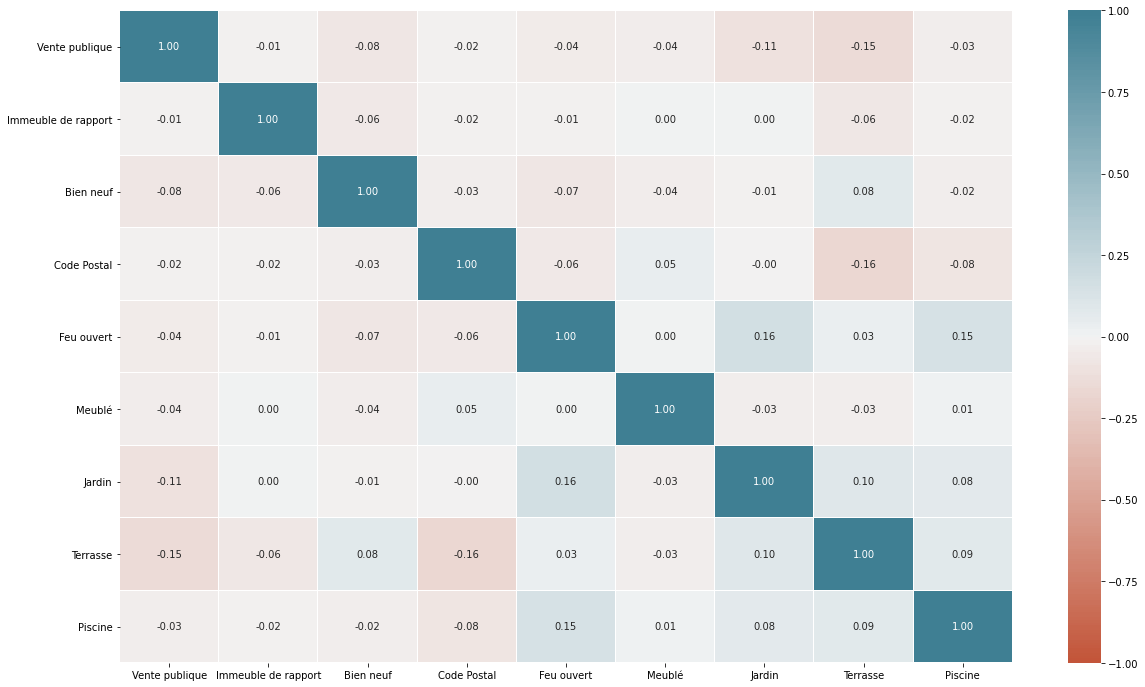

In [7]:
# Print the heatmap
plt.subplots(figsize=(20, 12))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

De base on ne peut pas voir de correlation et beaucoup de données sont en 'string' il va maintenant falloir remettre tout cela en ordre 

Z'est partit !

In [8]:
# On commence par la suppression des doublons s'il y en a
df.drop_duplicates(inplace=True)

In [9]:
# Suppression préliminaires des collonnes inutiles
df.drop(columns=['Lien'],inplace=True)
df.drop(columns=['Type de cuisine'],inplace=True)
df.drop(columns=['Sous-type de propriété'],inplace=True)
df.drop(columns=['Surface de la terrasse'],inplace=True)

In [10]:
def drop_string_and_float_transform(element):
    """
    Essaye de transformer un element en float
    Si pas, cela return un np.nan (non attribuate number)
    """
    try:
        transformed = float(element)
    except:
        transformed = np.nan
    finally:
        return transformed

## Nettoyage des collonnes
### Prix

In [11]:
# suppresion des strings et transformations des données en integer
print(df.shape)
df['Prix'] = df['Prix'].apply(drop_string_and_float_transform)
print(df['Prix'].isna().value_counts())
df.dropna(subset=['Prix'],inplace=True)
print(df.shape)

(18201, 19)
False    18178
True        23
Name: Prix, dtype: int64
(18178, 19)


In [12]:
df['Prix'] = df['Prix'].astype(int)

(18178, 19)

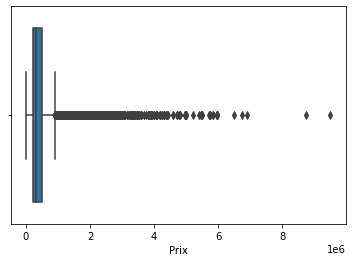

In [13]:
# affichage des outliers
sns.boxplot(x=df['Prix'])
df.shape

(14817, 19)

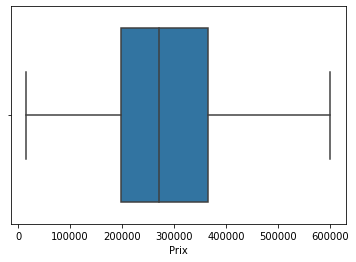

In [14]:
df = df[(df['Prix'] < 600000) & (df['Prix'] > 10000)]
sns.boxplot(x=df['Prix'])
df.shape

In [15]:
df.dtypes

Prix                                 int64
Type de propriété                   object
Vente publique                        bool
Immeuble de rapport                   bool
Bien neuf                             bool
Code Postal                          int64
Ville                               object
Nombre de façades                   object
Etat du bâtiment                    object
Surface habitable                   object
Nombre de chambre(s)                object
Feu ouvert                            bool
Meublé                                bool
Jardin                                bool
Surface du jardin                   object
Terrasse                              bool
Surface totale du terrain           object
Piscine                               bool
Surface de la zone constructible    object
dtype: object

### Nombre de chambre(s)

In [16]:
# Nombre de fois ou les différentes valeurs sont entrées
df['Nombre de chambre(s)'].value_counts()

3        3343
2        2781
2.0      2296
3.0      1506
4        1485
1.0       954
1         753
5         455
4.0       433
None      297
6         188
5.0       134
6.0        56
7          53
8          23
7.0        14
11          8
8.0         8
10          7
9           4
49.0        2
10.0        2
24          2
15.0        2
9.0         2
20          1
165.0       1
12          1
12.0        1
17          1
13          1
18.0        1
15          1
18          1
Name: Nombre de chambre(s), dtype: int64

In [17]:
# Suppression des lignes ou le nombres de chambre n'est pas indiqué
print(df.shape)
df = df[(df['Nombre de chambre(s)'] != 'None')]
print(df.shape)

(14817, 19)
(14520, 19)


In [18]:
df['Nombre de chambre(s)'] = df['Nombre de chambre(s)'].apply(drop_string_and_float_transform)
print(df['Nombre de chambre(s)'][0].dtype)

df['Nombre de chambre(s)'] = df['Nombre de chambre(s)'].astype(int)
df['Nombre de chambre(s)'].value_counts()

float64


2      5077
3      4849
4      1918
1      1707
5       589
6       244
7        67
8        31
10        9
11        8
9         6
15        3
12        2
18        2
49        2
24        2
20        1
13        1
17        1
165       1
Name: Nombre de chambre(s), dtype: int64

<AxesSubplot:xlabel='Nombre de chambre(s)'>

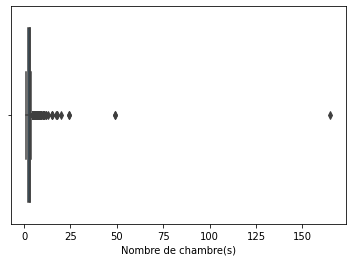

In [19]:
# affichage des outliers
sns.boxplot(x=df['Nombre de chambre(s)'])

A partir de la je n'ai plus qu'a identifier les outliers et filtrer mes lignes en conséquences

<AxesSubplot:xlabel='Nombre de chambre(s)'>

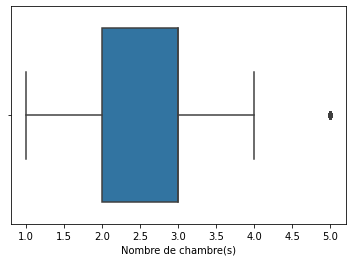

In [20]:
df = df[(df['Nombre de chambre(s)'] < 6) & (df['Nombre de chambre(s)'] > 0)]
sns.boxplot(x=df['Nombre de chambre(s)'])

In [21]:
print(df['Nombre de chambre(s)'].value_counts())
df.shape

2    5077
3    4849
4    1918
1    1707
5     589
Name: Nombre de chambre(s), dtype: int64


(14140, 19)

### Type de propriété

In [22]:
df['Type de propriété'].value_counts()

Maison         7085
Appartement    7055
Name: Type de propriété, dtype: int64

In [23]:
def property_to_bool(element):
    if element == "Maison":
        return 1
    else: 
        return 0
    
df['Type de propriété'] = df['Type de propriété'].apply(property_to_bool)

In [24]:
# 0 = Appartement
# 1 = Maison
df['Type de propriété'].value_counts()

1    7085
0    7055
Name: Type de propriété, dtype: int64

### Nombre de façades

In [25]:
print(df.shape)
df['Nombre de façades'].value_counts()

(14140, 19)


None    4539
2.0     4373
3.0     1942
4.0     1863
2        480
4        441
3        387
1.0      113
1          2
Name: Nombre de façades, dtype: int64

In [26]:
# Il faudrait supprimer trop d'entrée pour pouvoir l'utiliser dans un model de prédiction
# De plus la collonne n'est pas très pertinente, je vais donc la supprimer

df.drop(columns=['Nombre de façades'],inplace=True)

### Etat du bâtiment

In [27]:
df['Etat du bâtiment'].value_counts()

Excellent état        4190
None                  3907
Bon                   3461
À rénover              924
À rafraîchir           913
Fraîchement rénové     692
À restaurer             53
Name: Etat du bâtiment, dtype: int64

In [28]:
# Encore une fois trop de données manquantes pour la suite du projet
df.drop(columns=['Etat du bâtiment'],inplace=True)

### Surface habitable

In [29]:
df['Surface habitable'].value_counts()

None     1943
150.0     189
120.0     181
140.0     175
100.0     163
         ... 
297         1
418.0       1
337.0       1
500         1
268         1
Name: Surface habitable, Length: 718, dtype: int64

In [30]:

print(df.shape)
df['Surface habitable'] = df['Surface habitable'].apply(drop_string_and_float_transform)
print(df['Surface habitable'].isna().value_counts())
df.dropna(subset=['Surface habitable'],inplace=True)
print(df.shape)

(14140, 17)
False    12197
True      1943
Name: Surface habitable, dtype: int64
(12197, 17)


In [31]:
df['Surface habitable'] = df['Surface habitable'].astype(int)
df['Surface habitable'].value_counts()

100    260
120    258
150    253
90     251
140    226
      ... 
297      1
321      1
337      1
361      1
660      1
Name: Surface habitable, Length: 422, dtype: int64

<AxesSubplot:xlabel='Surface habitable'>

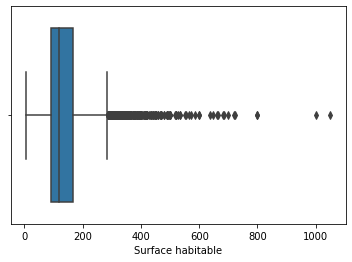

In [32]:
sns.boxplot(x=df['Surface habitable'])

(11500, 17)

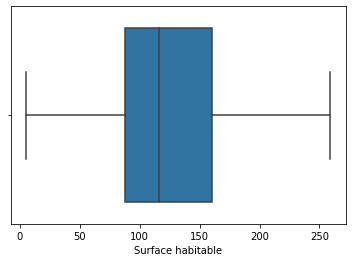

In [33]:
df = df[(df['Surface habitable'] < 260) & (df['Surface habitable'] > 0)]
sns.boxplot(x=df['Surface habitable'])
df.shape

### Surface du jardin

In [34]:
df['Surface du jardin'].value_counts()

None      9420
100.0       74
200.0       54
50.0        49
150.0       40
          ... 
1600.0       1
224.0        1
2600.0       1
1182.0       1
476.0        1
Name: Surface du jardin, Length: 532, dtype: int64

In [35]:
# 11k None .... drop it fast !
df.drop(columns=['Surface du jardin'],inplace=True)

### Jardin

In [36]:
# Cette collonne semble clean
df['Jardin'].value_counts()

False    7999
True     3501
Name: Jardin, dtype: int64

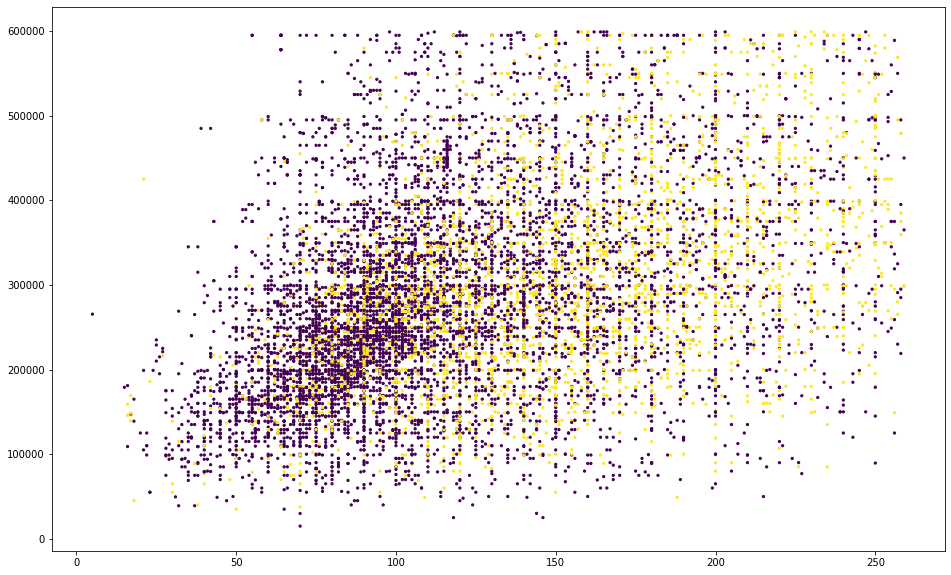

In [37]:
plt.figure(figsize=(16,10))
plt.scatter(df['Surface habitable'],df['Prix'], c=df['Jardin'], s=5)

### Immeuble de rapport

In [38]:
print(df['Immeuble de rapport'].value_counts())
# Les immeubles de rapport ne nous intéressent pas on va donc retirer ces lignes de notre dataset
print(df.shape)
df = df[df['Immeuble de rapport'] == False]
print(df.shape)
# Et enfin supprimer la collone
df.drop(columns=['Immeuble de rapport'],inplace=True)



False    11221
True       279
Name: Immeuble de rapport, dtype: int64
(11500, 16)
(11221, 16)


## Heatmap

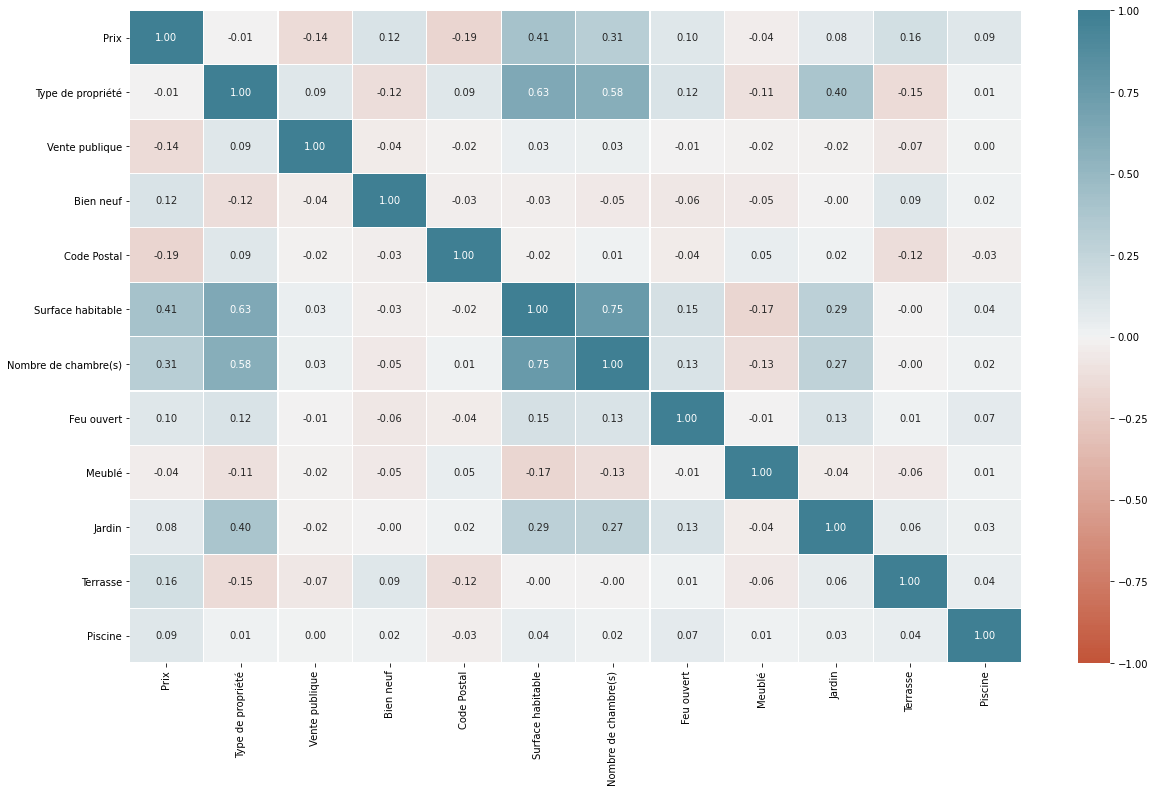

In [39]:
# Print the heatmap
plt.subplots(figsize=(20, 12))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [40]:
df.dtypes

Prix                                 int64
Type de propriété                    int64
Vente publique                        bool
Bien neuf                             bool
Code Postal                          int64
Ville                               object
Surface habitable                    int64
Nombre de chambre(s)                 int64
Feu ouvert                            bool
Meublé                                bool
Jardin                                bool
Terrasse                              bool
Surface totale du terrain           object
Piscine                               bool
Surface de la zone constructible    object
dtype: object

In [41]:
df.shape

(11221, 15)